In [1]:
# Antes de correr este archivo, renombrar los videos usando "Rename czi files.ipynb"

# Importo librerías necesarias
from ipynb.fs.defs.aux_functions import *

from ipywidgets import interact, interact_manual, interactive, fixed
from IPython.display import display
import pandas as pd

from os.path import exists
from PIL import Image

c:\Users\PC\anaconda3\envs\PKLS\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\Users\PC\anaconda3\envs\PKLS\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\Users\PC\anaconda3\envs\PKLS\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\Users\PC\anaconda3\envs\PKLS\lib\site-packages\tensorflow\python\framework\dtypes.

In [ ]:
# import sys
# import importlib
# importlib.reload(sys.modules['ipynb.fs.defs.aux_functions'])
# from ipynb.fs.defs.aux_functions import *
# !pip install aicspylibczi

In [2]:
# Guardo los directorios que voy a usar (cambiar si estoy en otra compu o si cambio de lugar algo)

drive_dir = r"H:\My Drive\Valen Agulló\Habenula\Experimentos Violeta 2024"
#disk_dir = "D:/Nico/VIDEOS MICROSCOPIO/Microscopio confocal/"
disk_dir = r"D:\Videos Confocal Valen"

#drive_dir = "L:/My Drive/Multimodal Integration/"
#disk_dir = "F:/Users/Nicolas/Desktop/REGISTROS CONFOCAL/"

data_dir = drive_dir 
areas_dir = r'C:\Users\PC\Desktop\Templados Violeta'
video_dir = disk_dir 

res_dir = r'C:\Users\PC\Desktop\Mascaras templados\Pkls'

fish_interval = (0, 155)

In [3]:
areas = load_areas(res_dir)

for key in areas:
    print(areas[key].trials)
    print(key + ":", len(areas[key].trials), "trials.")

[<ipynb.fs.defs.aux_functions.Trial object at 0x000001A31F049288>, <ipynb.fs.defs.aux_functions.Trial object at 0x000001A31F0509C8>, <ipynb.fs.defs.aux_functions.Trial object at 0x000001A31F050F08>, <ipynb.fs.defs.aux_functions.Trial object at 0x000001A31F05A488>, <ipynb.fs.defs.aux_functions.Trial object at 0x000001A31F05A9C8>, <ipynb.fs.defs.aux_functions.Trial object at 0x000001A31F05AF08>, <ipynb.fs.defs.aux_functions.Trial object at 0x000001A31F05F488>, <ipynb.fs.defs.aux_functions.Trial object at 0x000001A31F05F9C8>, <ipynb.fs.defs.aux_functions.Trial object at 0x000001A31F05FF08>, <ipynb.fs.defs.aux_functions.Trial object at 0x000001A31F065488>, <ipynb.fs.defs.aux_functions.Trial object at 0x000001A317498DC8>, <ipynb.fs.defs.aux_functions.Trial object at 0x000001A316C889C8>, <ipynb.fs.defs.aux_functions.Trial object at 0x000001A31F0659C8>, <ipynb.fs.defs.aux_functions.Trial object at 0x000001A31F065F08>, <ipynb.fs.defs.aux_functions.Trial object at 0x000001A31F06C488>, <ipynb.fs

In [6]:
areas

{'1-1': <ipynb.fs.defs.aux_functions.Area at 0x1a31f042d88>,
 '10-1': <ipynb.fs.defs.aux_functions.Area at 0x1a31f045e48>,
 '11-1': <ipynb.fs.defs.aux_functions.Area at 0x1a31ed27848>,
 '12-1': <ipynb.fs.defs.aux_functions.Area at 0x1a31f045e88>,
 '13-1': <ipynb.fs.defs.aux_functions.Area at 0x1a31f05f1c8>,
 '14-1': <ipynb.fs.defs.aux_functions.Area at 0x1a31f0bf848>,
 '15-1': <ipynb.fs.defs.aux_functions.Area at 0x1a31f11b1c8>,
 '17-1': <ipynb.fs.defs.aux_functions.Area at 0x1a31f121708>,
 '18-1': <ipynb.fs.defs.aux_functions.Area at 0x1a31f140808>,
 '19-1': <ipynb.fs.defs.aux_functions.Area at 0x1a31f1751c8>,
 '2-1': <ipynb.fs.defs.aux_functions.Area at 0x1a31f140708>,
 '20-1': <ipynb.fs.defs.aux_functions.Area at 0x1a31f16c888>,
 '21-1': <ipynb.fs.defs.aux_functions.Area at 0x1a31f1b6448>,
 '22-1': <ipynb.fs.defs.aux_functions.Area at 0x1a31f1d99c8>,
 '23-1': <ipynb.fs.defs.aux_functions.Area at 0x1a31f194e48>,
 '26-1': <ipynb.fs.defs.aux_functions.Area at 0x1a32fc83988>,
 '27-1': <

In [7]:
ULR_carpetas_test = { '1-1':r'D:\Videos Confocal Valen\100624\2024-06-10\1_NeuroD_plano1-01.czi\1_NeuroD_plano1-01_AcquisitionBlock2.czi',
                     '2-1': r'D:\Videos Confocal Valen\100624\2024-06-10\2_HuC_plano1-01.czi\2_HuC_plano1-01_AcquisitionBlock2.czi',
                     '4-1':r'D:\Videos Confocal Valen\250624\2024-06-25\4-1-01.czi\4-1-01_AcquisitionBlock2.czi',
                     '5-1':r'D:\Videos Confocal Valen\250624\2024-06-25\5-1-01.czi\5-1-01_AcquisitionBlock2.czi',
                     '6-1':r'D:\Videos Confocal Valen\250624\2024-06-25\6-1-01.czi\6-1-01_AcquisitionBlock2.czi',
                     '7-1':r'D:\Videos Confocal Valen\270624\2024-06-27\7-1-01.czi\7-1-01_AcquisitionBlock2.czi',
                     '8-1':r'D:\Videos Confocal Valen\270624\2024-06-27\8-1-01.czi\8-1-03_AcquisitionBlock2.czi',
                     '10-1':r'D:\Videos Confocal Valen\270624\2024-06-27\10-1-01.czi\10-1-01_AcquisitionBlock2.czi',
                     '11-1':r'D:\Videos Confocal Valen\280624\2024-06-28\11-1-02.czi\11-1-02_AcquisitionBlock2.czi',
                     '12-1':r'D:\Videos Confocal Valen\280624\2024-06-28\12-1-01.czi\12-1-01_AcquisitionBlock2.czi',
                     '13-1':r'D:\Videos Confocal Valen\280624\2024-06-28\13-1-01.czi\13-1-01_AcquisitionBlock2.czi',
                     '14-1':r'D:\Videos Confocal Valen\280624\2024-06-28\14-1-01.czi\14-1-01_AcquisitionBlock2.czi',
                     '15-1':r'D:\Videos Confocal Valen\290624\2024-06-29\15-1-01.czi\15-1-01_AcquisitionBlock2.czi',
                     '17-1':r'D:\Videos Confocal Valen\290624\2024-06-29\17-1-01.czi\17-1-01_AcquisitionBlock2.czi',
                     '18-1':r'D:\Videos Confocal Valen\110724\2024-07-11\18-1-01.czi\18-1-01_AcquisitionBlock2.czi',
                     '19-1':r'D:\Videos Confocal Valen\110724\2024-07-11\19-1-01.czi\19-1-01_AcquisitionBlock2.czi',
                     '20-1':r'D:\Videos Confocal Valen\110724\2024-07-11\20-1-01.czi\20-1-01_AcquisitionBlock2.czi',
                     '21-1':r'D:\Videos Confocal Valen\120724\2024-07-12\21-1-02.czi\21-1-02_AcquisitionBlock2.czi',
                     '22-1':r'D:\Videos Confocal Valen\120724\2024-07-12\22-1-01.czi\22-1-01_AcquisitionBlock2.czi',
                     '23-1':r'D:\Videos Confocal Valen\120724\2024-07-12\23-1-02.czi\23-1-02_AcquisitionBlock2.czi',
                    #  '25-1':r'D:\Videos Confocal Valen\130724\2024-07-13\25-1-01.czi\25-1-01_AcquisitionBlock2.czi',
                     '26-1':r'D:\Videos Confocal Valen\150724\2024-07-15\26-1-02.czi\26-1-02_AcquisitionBlock2.czi',
                     '27-1':r'D:\Videos Confocal Valen\150724\2024-07-15\27-1-01.czi\27-1-01_AcquisitionBlock2.czi',                     
                     }
                      
                    #  ,
                    #  r'D:\Videos Confocal Valen\250624\2024-06-25\5-1-01.czi\5-1-01_AcquisitionBlock2.czi',
                    #  r'D:\Videos Confocal Valen\270624\2024-06-27\8-1-01.czi\8-1-03_AcquisitionBlock2.czi',
                    #  r'D:\Videos Confocal Valen\280624\2024-06-28\12-1-01.czi\12-1-01_AcquisitionBlock2.czi',
                    #  r'D:\Videos Confocal Valen\290624\2024-06-29\15-1-01.czi\15-1-01_AcquisitionBlock2.czi',
                    #  r'D:\Videos Confocal Valen\110724\2024-07-11\19-1-01.czi\19-1-01_AcquisitionBlock2.czi'}

In [8]:
def buscar_archivo(nombre_archivo, ruta_base):
    # Recorremos todas las carpetas y archivos dentro de la ruta base
    for root, dirs, files in os.walk(ruta_base):
        # Si el archivo está en la lista de archivos en esta carpeta
        if nombre_archivo in files:
            # Retornamos la ruta completa al archivo
            return os.path.join(root, nombre_archivo)
    
    # Si no se encuentra, retornamos un mensaje indicando que no existe
    return f'Archivo {nombre_archivo} no encontrado en {ruta_base}'

# Definir el nombre del archivo y la ruta base

ruta_base = 'D:\\Videos Confocal Valen'

In [15]:
for j, key in enumerate(areas):
    if key not in ULR_carpetas_test.keys():
        dia = areas['4-1'].fecha[-2:]
        mes = areas['1-1'].fecha[-5:-3]
        año = areas['1-1'].fecha[2:4]
        print(key)

In [9]:
for key in areas:
    print(key)

1-1
10-1
11-1
12-1
13-1
14-1
15-1
17-1
18-1
19-1
2-1
20-1
21-1
22-1
23-1
26-1
27-1
4-1
5-1
6-1
7-1
8-1


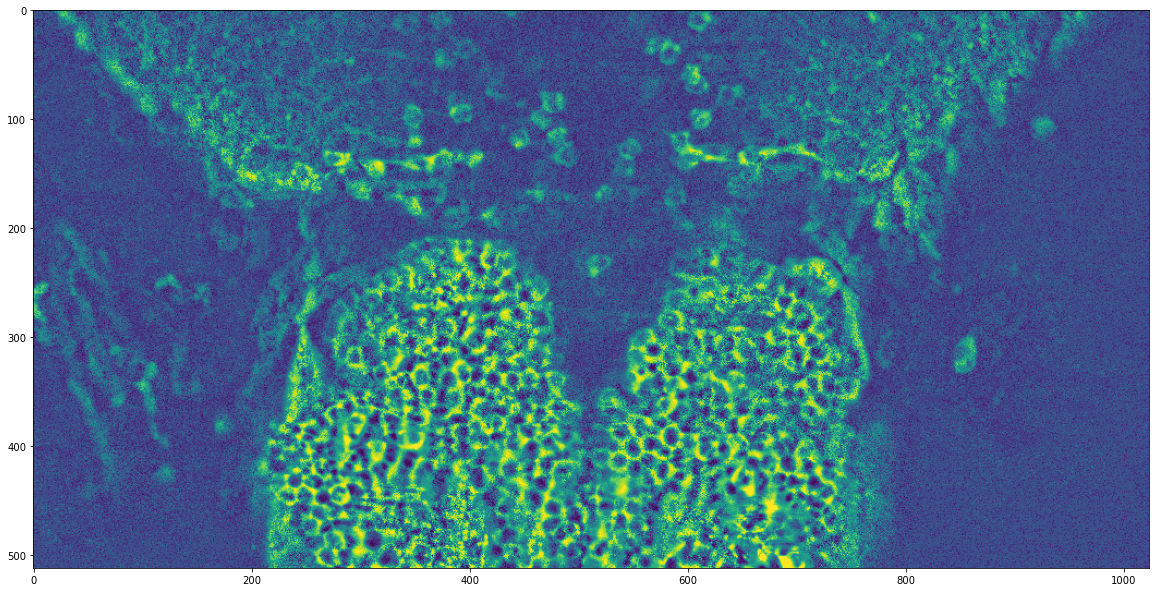

In [9]:
plt.figure(figsize=(20,20))
plt.imshow(areas['8-1'].template)


In [11]:
len(areas)

23

In [12]:
# Cargo el video de cada trial y lo incluyo en el objeto. Excluyo trials que no tienen video.
areas = load_areas(res_dir)
areas.pop('25-1')
for key in areas:
    
    area = areas[key]
    trials = areas[key].trials
    
    for g,trial in enumerate(trials):
        # try:
        #     os.chdir(ULR_carpetas_test[j])
        # except:
        #     continue

        print(trial.trial)
        
        images = None
        
        # if exists(os.getcwd() + "/" + str(trial.trial) + ".czi"):
        #     images = load_czi(os.getcwd(), ULR_carpetas_test[j].split('\\')[-1][:-4]+'_Loop'+str(trial.trial)+'.czi', file_type = "video")
        # elif exists(os.getcwd() + "/" + str(trial.trial) + ".tif"):
        #     images = read_tiff(os.getcwd() + "/" + str(trial.trial) + ".tif")
        # images = read_tiff(os.getcwd() + "/" +ULR_carpetas_test[j].split('\\')[-1][:-4]+'_Loop'+str(g+1)+'_mov_c_f.tiff')
        images = read_tiff(ULR_carpetas_test[key] +'\\'+ ULR_carpetas_test[key].split('\\')[-1][:-4]+'_Loop'+str(g+1)+'_mov_c_f.tiff')
        # images = load_czi(os.getcwd(), ULR_carpetas_test[j].split('\\')[-1][:-4]+'_Loop'+str(g+1)+'.czi', file_type = "video")
        if images is not None:
            print(images.shape)
            trial.set_video(images)
            trial.nframes= len(images)
        else:
            print("Could not load: ", trial.trial, trial.pez, trial.area)

            
    new_trials = []
    
    for trial in trials:
        if hasattr(trial, "video"):
            new_trials.append(trial)
    
    trials = new_trials
    
    
    median = []

    for t in trials:
        median.append(t.video.shape[1])

    median = np.median(median)
    
    stack = []
    new_trials = []

    for t in trials:
        if t.video.shape[1] == median: 
            print(t.video)
            stack.append(t.video)
            new_trials.append(t)

    area.trials = new_trials
    area.stack = np.concatenate(stack, axis = 0)
    
    print("Area", key, "|", len(area.trials), "trials | Stack:", area.stack.shape)

1
(229, 128, 256)
2
(230, 128, 256)
3
(231, 128, 256)
4
(229, 128, 256)
5
(230, 128, 256)
6
(231, 128, 256)
7
(229, 128, 256)
8
(230, 128, 256)
9
(231, 128, 256)
10
(229, 128, 256)
11
(230, 128, 256)
12
(231, 128, 256)
13
(229, 128, 256)
14
(230, 128, 256)
15
(231, 128, 256)
16
(229, 128, 256)
17
(230, 128, 256)
18
(231, 128, 256)
19
(229, 128, 256)
20
(230, 128, 256)
[[[3.1162467 3.1162467 2.1672034 ... 3.1863837 4.099882  3.2114573]
  [2.9124236 2.9124236 2.1214314 ... 3.7197433 5.1414866 3.3637953]
  [1.8917599 1.8917599 2.1145024 ... 4.461252  4.3924704 3.3909154]
  ...
  [1.9913931 1.9913931 1.8789992 ... 1.8894992 2.1122417 2.169651 ]
  [2.8748975 2.8748975 2.2343354 ... 2.251431  2.9208326 3.1127396]
  [2.8748975 2.8748975 2.2343354 ... 2.251431  2.9208326 3.1127396]]

 [[2.2151456 2.2151456 1.9720585 ... 3.2780309 2.9508862 3.0694785]
  [2.8801408 2.8801408 3.1007628 ... 3.1649284 2.9722981 3.8130941]
  [2.7723331 2.7723331 3.0349412 ... 8.16785   3.7447166 2.8730736]
  ...
  [

In [17]:

for key in areas:
    area = areas[key]
    print(key)
    
    m_rig= area.stack

    
    area.m_rig = m_rig


1-1
10-1
11-1
12-1
13-1
14-1
15-1
17-1
18-1
19-1
2-1
20-1
21-1
22-1
23-1
26-1
27-1
4-1
5-1
6-1
7-1
8-1


In [68]:
# Aplico algoritmo de Motion Correction de CaImAn sobre cada stack de videos concatenados, uno por área.

# for key in areas:
#     area = areas[key]
#     print(key)
    
#     m_rig, m_template, m_shift, dview = motion_correct(area.stack, template = area.template_small, frate = 4, decay_time = 3.0)
#     movement = np.array(np.abs(m_shift)).sum(axis=1)
    
#     area.m_rig = m_rig
#     area.m_template = m_template
#     area.m_shifts = m_shift
#     area.movements = movement

#     print(movement.mean())
    
#     plt.plot(movement)
#     plt.show()

#     plt.imshow(m_template, cmap = "gray")
#     plt.show()
    
#     dview.terminate()

1-1


ValueError: Error: images must really be same size for register_translation

In [14]:
for key in areas:
    area = areas[key]
    
    index = 0
    
    for t in area.trials:
        print(t.trial)

        v_len = t.nframes
        t.roi_activities = {}
        t.grid_activities = {}
        
        for subarea in area.contours_small:
            print(subarea)

            t.roi_activities[subarea] = get_neuron_activities(area.stack[index:index+v_len], area.contours_small[subarea])
            t.grid_activities[subarea] = get_grid_activities(area.stack[index:index+v_len], area.grids[subarea])

        index = index + v_len

1
Hb
palium
2
Hb
palium
3
Hb
palium
4
Hb
palium
5
Hb
palium
6
Hb
palium
7
Hb
palium
8
Hb
palium
9
Hb
palium
10
Hb
palium
11
Hb
palium
12
Hb
palium
13
Hb
palium
14
Hb
palium
15
Hb
palium
16
Hb
palium
17
Hb
palium
18
Hb
palium
19
Hb
palium
20
Hb
palium
161
Hb
palium
162
Hb
palium
163
Hb
palium
164
Hb
palium
165
Hb
palium
166
Hb
palium
167
Hb
palium
168
Hb
palium
169
Hb
palium
170
Hb
palium
171
Hb
palium
172
Hb
palium
173
Hb
palium
174
Hb
palium
175
Hb
palium
176
Hb
palium
177
Hb
palium
178
Hb
palium
179
Hb
palium
180
Hb
palium
181
Hb
palium
182
Hb
palium
183
Hb
palium
184
Hb
palium
185
Hb
palium
186
Hb
palium
187
Hb
palium
188
Hb
palium
189
Hb
palium
190
Hb
palium
191
Hb
palium
192
Hb
palium
193
Hb
palium
194
Hb
palium
195
Hb
palium
196
Hb
palium
197
Hb
palium
198
Hb
palium
199
Hb
palium
200
Hb
palium
201
Hb
palium
202
Hb
palium
203
Hb
palium
204
Hb
palium
205
Hb
palium
206
Hb
palium
207
Hb
palium
208
Hb
palium
209
Hb
palium
210
Hb
palium
211
Hb
palium
212
Hb
palium
213
Hb
palium
214
Hb


In [15]:
import numpy as np
from scipy.signal import savgol_filter, medfilt
from scipy.ndimage import percentile_filter
import matplotlib.pyplot as plt
from pykalman import KalmanFilter
import pywt
from statsmodels.robust import mad

def wavelet_denoise(data, wavelet='db2', level=3):
    # Decompose to get the wavelet coefficients
    coeff = pywt.wavedec(data, wavelet, mode="per")
    
    # Define threshold as a function of the noise variance
    sigma = mad(coeff[-level])
    uthresh = sigma * np.sqrt(2*np.log(len(data)))
    coeff[1:] = (pywt.threshold(i, value=uthresh, mode='hard') for i in coeff[1:])
    
    # Reconstruct the signal using the thresholded coefficients
    return pywt.waverec(coeff, wavelet, mode='per')

def kalman_denoise(data):
    # Initialize the Kalman filter
    kf = KalmanFilter(transition_matrices = [1],
                      observation_matrices = [1],
                      initial_state_mean = data[0],
                      initial_state_covariance = 1,
                      observation_covariance=0.1,
                      transition_covariance=0.1)
    
    # Use the Kalman filter to estimate the hidden state
    return kf.smooth(data)[0].flatten()

def past_percentile_filter(data, percentile, size):
    output = np.empty_like(data)
    for i in range(len(data)):
        if i < size:
            # For the initial elements, we still need to consider some "future" elements
            output[i] = np.percentile(data[:i+size+1], percentile)
        else:
            output[i] = np.percentile(data[i-size:i+1], percentile)
    return output

def to_dffs(activities, baseline_window=60, percentile=8):
    # Calculate a rolling baseline using a percentile filter
    baselines = np.empty_like(activities)
    for i in range(activities.shape[0]):
        #baselines[i, :] = percentile_filter(activities[i, :], percentile, size=baseline_window)
        baselines[i, :] = past_percentile_filter(activities[i, :], percentile, size=baseline_window)

    # Ensure the baseline is not zero to avoid division by zero
    baselines = np.where(baselines==0, np.finfo(float).eps, baselines)

    # Calculate dF/F
    dffs = (activities - baselines) / baselines

    return dffs, baselines

def to_binaries(dffs, smooth_window=5, polyorder=3, multiplier=3):
    # Smooth the dF/F signal using a Savitzky-Golay filter
    smooth_dffs = np.empty_like(dffs)
    
    for i in range(dffs.shape[0]):
    #    smooth_dffs[i, :] = savgol_filter(dffs[i, :], smooth_window, polyorder)
        smooth_dffs[i, :] = kalman_denoise(dffs[i, :])
    #    smooth_dffs[i, :] = wavelet_denoise(dffs[i, :])
        
    # Calculate the noise level using the median absolute deviation
    mad = np.median(np.abs(smooth_dffs - np.median(smooth_dffs, axis=1, keepdims=True)), axis=1, keepdims=True)

    # Threshold for event detection
    threshold = np.median(smooth_dffs, axis=1, keepdims=True) + multiplier * mad

    # A neuron is active if the dF/F signal exceeds the threshold
    binaries = smooth_dffs > threshold

    return binaries, smooth_dffs

ModuleNotFoundError: No module named 'pykalman'

In [16]:
import dask.bag as db

# Adjust these values based on your system's resources
num_workers = 10 # Set the number of workers
client = Client(n_workers=num_workers)

def process_trial(trial):
    print("Processing trial number", trial.trial)

    trial.roi_dffs = {}
    trial.roi_baselines = {}
    trial.roi_binaries = {}
    trial.roi_smooth_dffs = {}
    
    for subarea in trial.roi_activities:
        activities = trial.roi_activities[subarea]

        if activities.shape[0] == 0:
            print("No neurons in this region... weird.", trial.trial, subarea)
            continue

        trial.roi_dffs[subarea], trial.roi_baselines[subarea] = to_dffs(activities)
        trial.roi_binaries[subarea], trial.roi_smooth_dffs[subarea] = to_binaries(trial.roi_dffs[subarea])

        print(subarea, "| Activities:", activities.shape, "| dF/Fs:", trial.roi_dffs[subarea].shape, "| Binaries:", trial.roi_binaries[subarea].shape)
    
    trial.grid_dffs = {}
    trial.grid_baselines = {}
    trial.grid_binaries = {}
    trial.grid_smooth_dffs = {}
    
    for subarea in trial.grid_activities:
        activities = trial.grid_activities[subarea]

        if activities.shape[0] == 0:
            print("No neurons in this region... weird.", trial.trial, subarea)
            continue

        trial.grid_dffs[subarea], trial.grid_baselines[subarea] = to_dffs(activities)
        trial.grid_binaries[subarea], trial.grid_smooth_dffs[subarea] = to_binaries(trial.grid_dffs[subarea])

        print(subarea, "| Activities:", activities.shape, "| dF/Fs:", trial.grid_dffs[subarea].shape, "| Binaries:", trial.grid_binaries[subarea].shape)

    return trial

for key in areas:
    if key!= '25-1':
        print("Processing area number", key)
        
        trials_bag = db.from_sequence(areas[key].trials)
        trials = trials_bag.map(process_trial).compute()
        
        # Now, trials contain the processed trial objects and you can assign it back or use as needed.
        areas[key].trials = trials



Processing area number 1-1
Processing area number 10-1
Processing area number 11-1
Processing area number 12-1
Processing area number 13-1
Processing area number 14-1
Processing area number 15-1
Processing area number 17-1
Processing area number 18-1
Processing area number 19-1
Processing area number 2-1
Processing area number 20-1
Processing area number 21-1
Processing area number 22-1
Processing area number 23-1
Processing area number 26-1
Processing area number 27-1
Processing area number 4-1
Processing area number 5-1
Processing area number 6-1
Processing area number 7-1
Processing area number 8-1


In [18]:
def to_dffs(activities, acts_to_filter, time_scale_in_frames = 15, window = 10, fast = False):
    baseline = linearly_extended_filter(acts_to_filter, time_scale_in_frames, window = window, fast = fast)
    #baseline = gaussian_filter1d(activities, time_scale_in_frames, mode = 'nearest')
    
    dffs = (activities - baseline)#/baseline
    return dffs, baseline

dffs_scale_seconds = 4
dffs_window_seconds = 3

binaries_std_s = 1
binaries_window_seconds = 15

binaries_baseline = 15
binaries_th = 1.5

for key in areas:
    print(key)
    for trial in areas[key].trials:
        frames_per_s = trial.nframes / trial.total_time
        
        for subarea in trial.roi_binaries:
            
            new_acts = []
            
            for roi in range(trial.roi_binaries[subarea].shape[0]):
                x = np.arange(len(trial.roi_binaries[subarea][roi]))[trial.roi_binaries[subarea][roi]==0]
                y = trial.roi_activities[subarea][roi,trial.roi_binaries[subarea][roi]==0]
                
                nx = np.arange(trial.nframes)
                ny = np.interp(nx,x,y)
                
                new_acts.append(ny)
            
            new_acts = np.vstack(new_acts)
            
            trial.roi_dffs[subarea], __ = to_dffs(trial.roi_activities[subarea], new_acts, time_scale_in_frames = frames_per_s * dffs_scale_seconds,
                                                             window = int(frames_per_s * dffs_window_seconds), fast = True)
            
        for subarea in trial.grid_binaries:
            
            new_acts = []
            
            for grid in range(trial.grid_binaries[subarea].shape[0]):
                x = np.arange(len(trial.grid_binaries[subarea][grid]))[trial.grid_binaries[subarea][grid]==0]
                y = trial.grid_activities[subarea][grid,trial.grid_binaries[subarea][grid]==0]
                
                nx = np.arange(trial.nframes)
                ny = np.interp(nx,x,y)
                
                new_acts.append(ny)
            
            new_acts = np.vstack(new_acts)
            
            trial.grid_dffs[subarea], __ = to_dffs(trial.grid_activities[subarea], new_acts, time_scale_in_frames = frames_per_s * dffs_scale_seconds,
                                                             window = int(frames_per_s * dffs_window_seconds), fast = True)

1-1
10-1
11-1
12-1
13-1
14-1
15-1
17-1
18-1
19-1
2-1
20-1
21-1
22-1
23-1
26-1
27-1
4-1
5-1
6-1
7-1
8-1


In [23]:
# def to_binaries(dffs, std = 3, window = 10, baseline = 25, th = 1.4, ret_params = False, fast = False):
#     #filtered = gaussian_filter1d(dffs, std)
#     filtered = linearly_extended_filter(dffs, std, window = window, fast = fast)
    
#     perc = np.percentile(filtered, baseline, axis = 1)
#     th = th*np.std(dffs, axis = 1)
#     thresholded = np.zeros(filtered.shape).astype('bool')
#     thresholded[filtered > np.expand_dims((perc+th), axis=1)] = 1
    
#     if ret_params:
#         return thresholded, filtered, perc, th
#     else:
#         return thresholded, filtered

# binaries_std_s = 1
# binaries_window_seconds = 15

# binaries_baseline = 15
# binaries_th = 1.2

# for key in areas:
#     print(key)
#     for trial in areas[key].trials:
#         frames_per_s = trial.nframes / trial.total_time
        
#         for subarea in trial.roi_activities:
#             activities = trial.roi_activities[subarea]
            
#             if activities.shape[0] > 0:
#                 trial.roi_binaries[subarea], trial.roi_smooth_dffs[subarea] = to_binaries(trial.roi_dffs[subarea],
#                                               std = binaries_std_s*frames_per_s, window = int(binaries_window_seconds*frames_per_s),
#                                               baseline = binaries_baseline, th = binaries_th, fast = True)
                
#         for subarea in trial.grid_activities:
#             activities = trial.grid_activities[subarea]
            
#             if activities.shape[0] > 0:
#                 trial.grid_binaries[subarea], trial.grid_smooth_dffs[subarea] = to_binaries(trial.grid_dffs[subarea],
#                                               std = binaries_std_s*frames_per_s, window = int(binaries_window_seconds*frames_per_s),
#                                               baseline = binaries_baseline, th = binaries_th, fast = True)

1-1
10-1
11-1
12-1
13-1
14-1
15-1
17-1
18-1
19-1
2-1
20-1
21-1
22-1
23-1
25-1


KeyError: 'palium'

In [52]:


# def to_binaries(dffs, std=3, window=10, baseline=25, th=1.4, ret_params=False, fast=False):
#     # filtered = gaussian_filter1d(dffs, std)
#     filtered = linearly_extended_filter(dffs, std, window=window, fast=fast)

#     # Check for NaN or infinite values in filtered data
#     if np.isnan(filtered).any() or np.isinf(filtered).any():
#         print("Filtered data contains NaN or Inf values. Replacing with zeros.")
#         filtered = np.nan_to_num(filtered)
    
#     perc = np.percentile(filtered, baseline, axis=1)
#     th_values = th * np.std(dffs, axis=1)
    
#     # Ensure no NaN or Inf in threshold values
#     if np.isnan(th_values).any() or np.isinf(th_values).any():
#         print("Threshold values contain NaN or Inf. Replacing with zeros.")
#         th_values = np.nan_to_num(th_values)
    
#     thresholded = np.zeros(filtered.shape, dtype=bool)
#     thresholded[filtered > np.expand_dims((perc + th_values), axis=1)] = 1

#     if ret_params:
#         return thresholded, filtered, perc, th_values
#     else:
#         return thresholded, filtered

# # Parameters for binary conversion
# binaries_std_s = 1
# binaries_window_seconds = 15
# binaries_baseline = 15
# binaries_th = 1.2

# # Continue processing only unprocessed keys
# for key in areas:
#     if key not in processed_keys:
#         print("Processing area number", key)
#         try:
#             for trial in areas[key].trials:
#                 frames_per_s = trial.nframes / trial.total_time

#                 for subarea in trial.roi_activities:
#                     activities = trial.roi_activities[subarea]

#                     if activities.shape[0] > 0:
#                         trial.roi_binaries[subarea], trial.roi_smooth_dffs[subarea] = to_binaries(
#                             trial.roi_dffs[subarea],
#                             std=binaries_std_s * frames_per_s,
#                             window=int(binaries_window_seconds * frames_per_s),
#                             baseline=binaries_baseline,
#                             th=binaries_th,
#                             fast=True
#                         )

#                 for subarea in trial.grid_activities:
#                     activities = trial.grid_activities[subarea]

#                     if activities.shape[0] > 0:
#                         trial.grid_binaries[subarea], trial.grid_smooth_dffs[subarea] = to_binaries(
#                             trial.grid_dffs[subarea],
#                             std=binaries_std_s * frames_per_s,
#                             window=int(binaries_window_seconds * frames_per_s),
#                             baseline=binaries_baseline,
#                             th=binaries_th,
#                             fast=True
#                         )
            
#             # Add key to processed_keys after successful processing
#             processed_keys.append(key)

#         except ValueError as e:
#             print(f"Error processing area {key}: {e}. Skipping this area.")
#             continue

# # If processed_keys is not defined yet, initialize it before running this:
# processed_keys = ['1-1', '10-1', '11-1', '12-1', '13-1', '14-1', '15-1', '17-1', '18-1', '19-1', '2-1', '20-1', '21-1', '22-1', '23-1']


Processing area number 25-1


KeyError: 'palium'

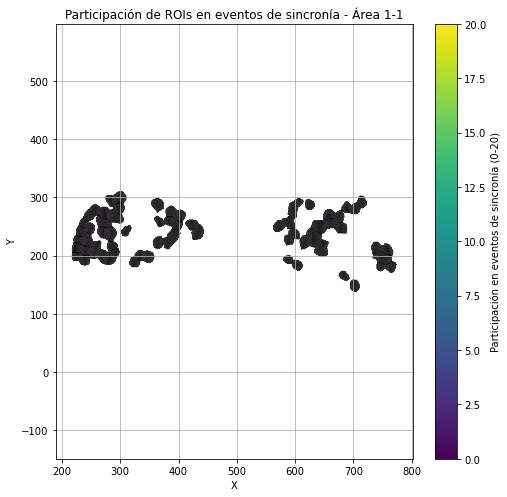

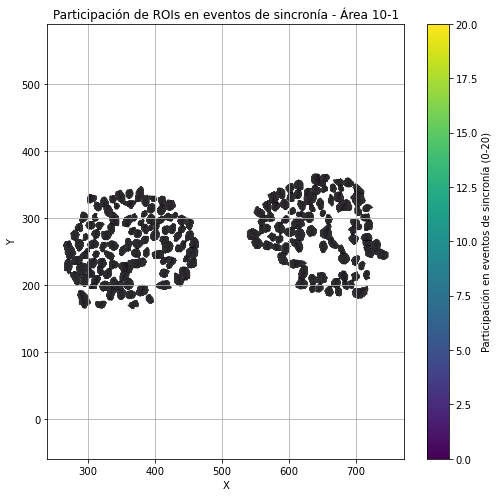

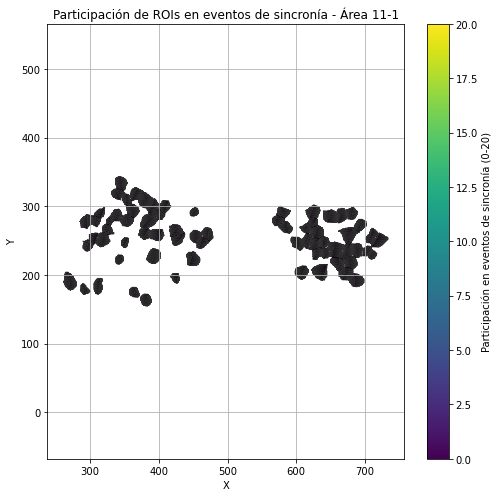

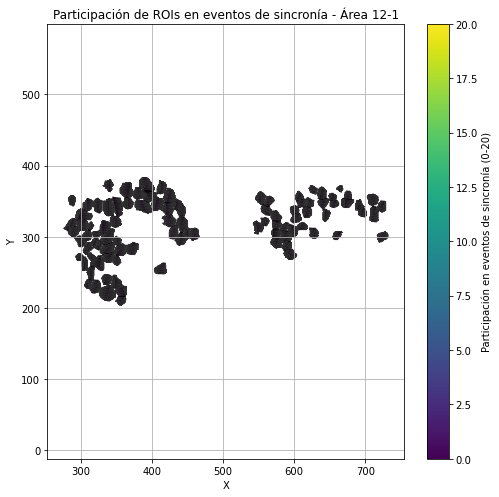

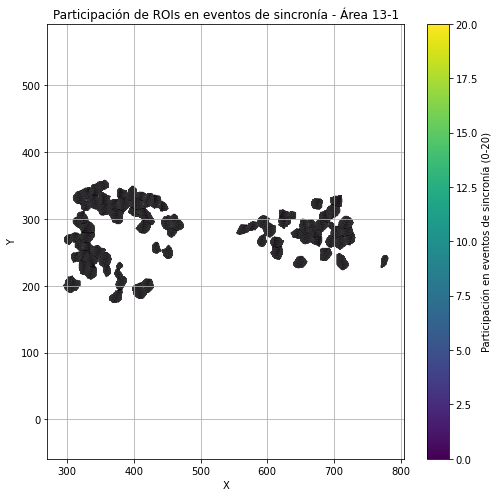

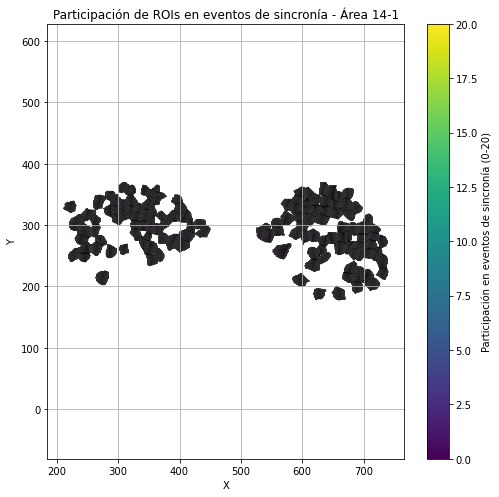

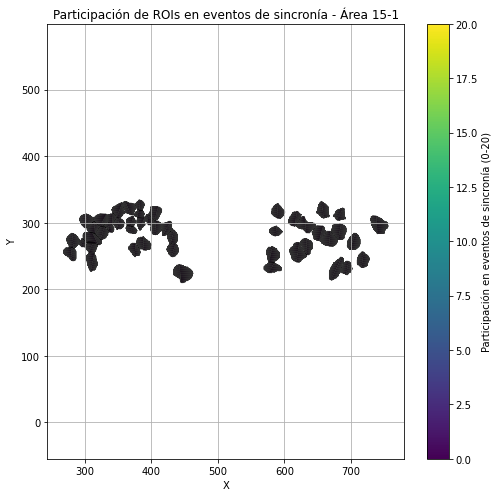

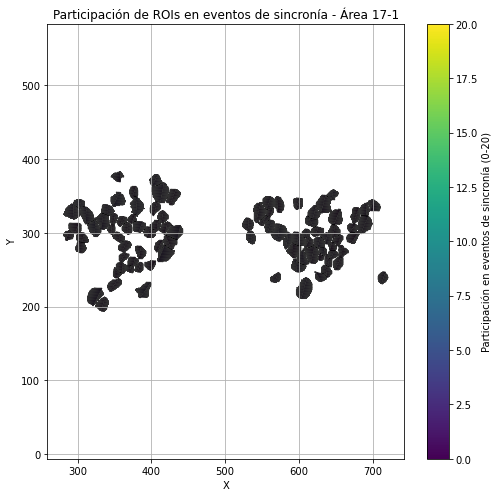

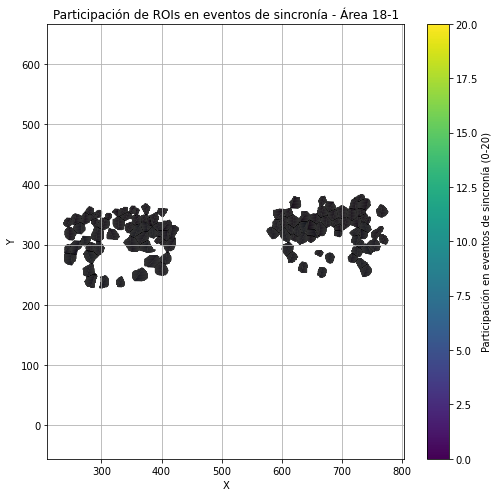

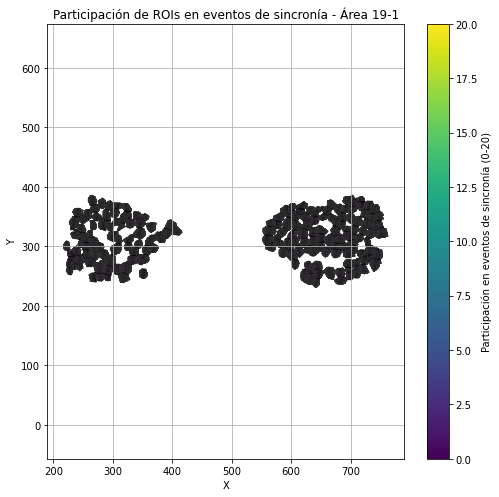

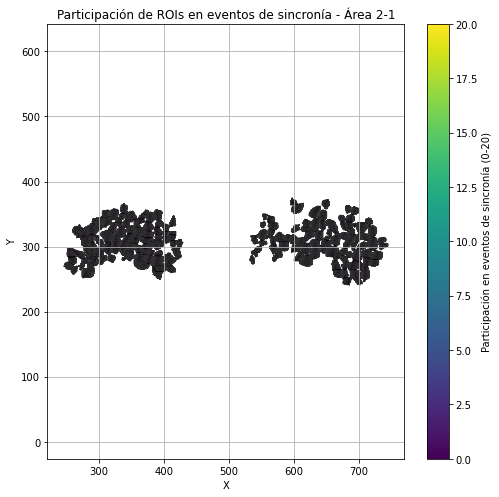

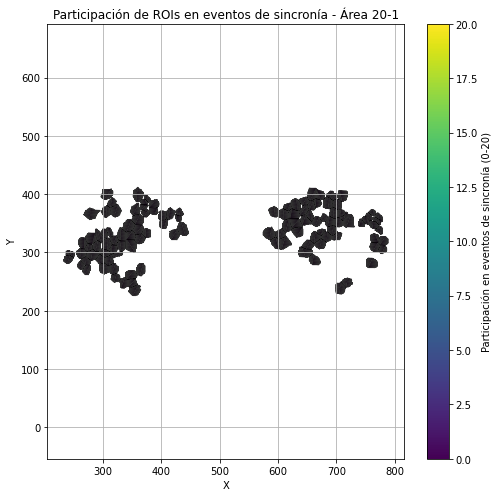

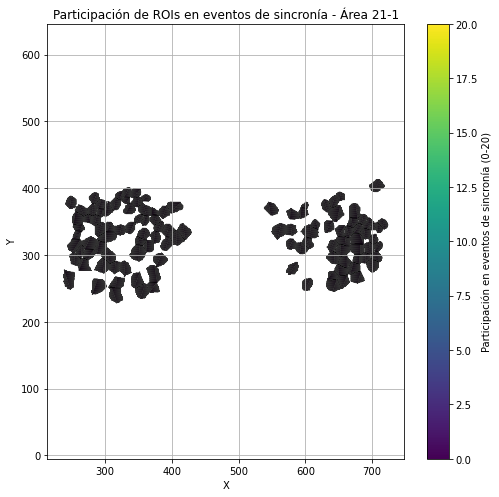

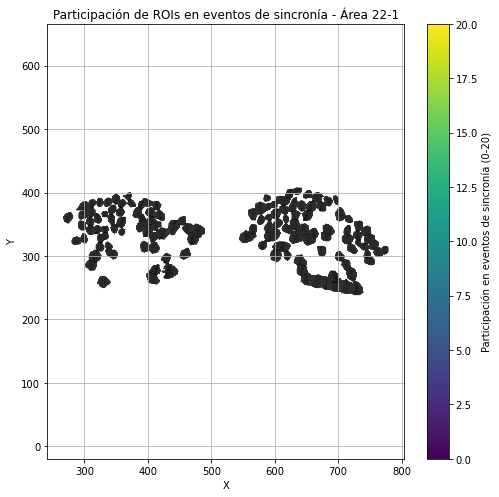

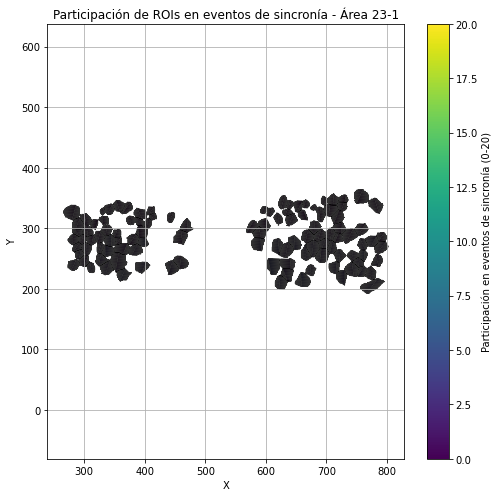

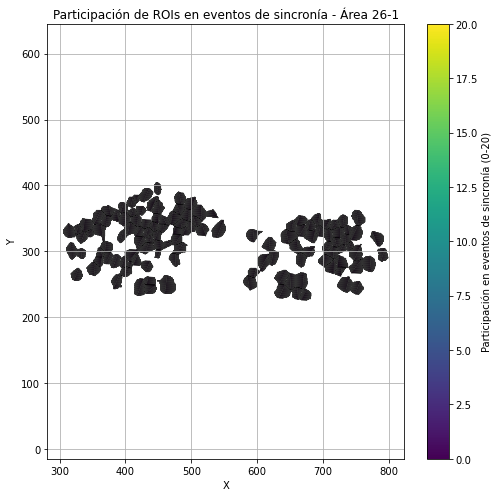

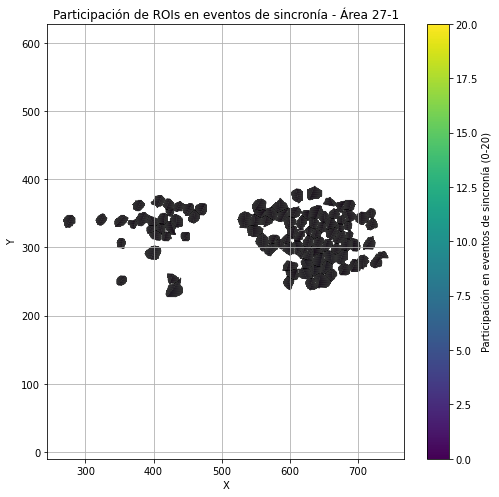

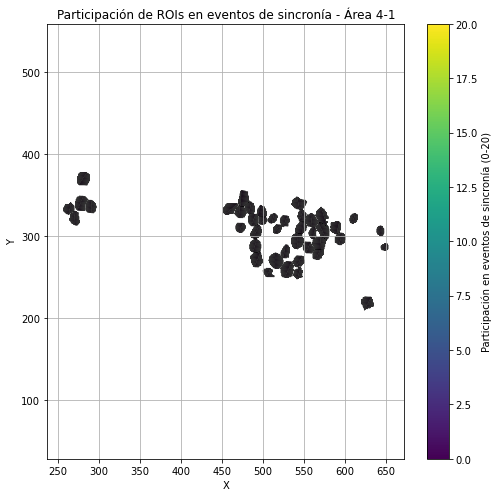

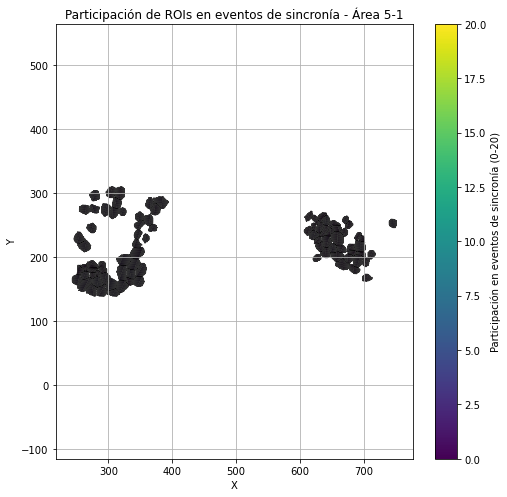

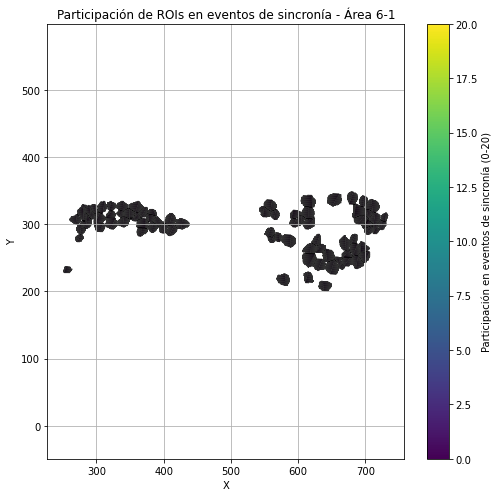

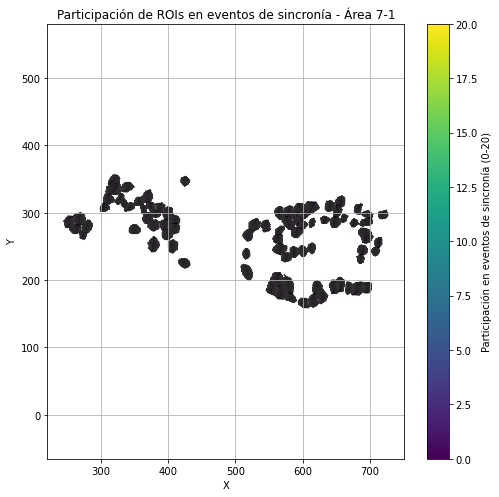

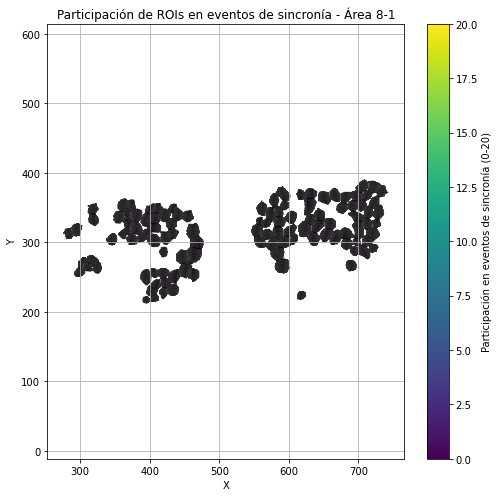

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, leaves_list
from scipy.ndimage import gaussian_filter1d
from matplotlib import cm

# Definir el rango de frames de interés
frame_start = 140
frame_end = 160

for key in areas:
    # Inicializar un array para contar la participación de cada ROI en los eventos de sincronía
    roi_sync_count = np.zeros(len(areas[key].contours['Hb']))

    for j in range(len(areas[key].trials)):
        if areas[key].trials[j].vis == 0 and areas[key].trials[j].aud == 1:
            # Convertir la lista de listas a un array de numpy para manipularlo fácilmente
            data_array = areas[key].trials[j].roi_dffs["Hb"][areas[key].roi_lefties['Hb'] == True]

            # Realizar clustering jerárquico para encontrar la similitud entre filas
            Z = linkage(data_array, method='centroid')
            row_order = leaves_list(Z)

            # Reordenar las filas del array de datos según el orden calculado
            sorted_data_array = data_array[row_order, :]

            # Normalizar los datos
            data_z = sorted_data_array - np.expand_dims(np.mean(sorted_data_array, axis=1), axis=1)
            data_z = data_z / np.expand_dims(np.std(data_z, axis=1), axis=1)

            # Promediar los datos y aplicar filtro gaussiano
            promedio_data_z = data_z.mean(axis=0)
            promedio_filtrado = gaussian_filter1d(promedio_data_z, 3)
            mascara_th = promedio_filtrado > 0.4

            # Encontrar los índices de inicio de los momentos de sincronía
            start_indices = np.where((mascara_th[:-1] == False) & (mascara_th[1:] == True))[0] + 1
            if mascara_th[0] == True:
                start_indices = np.insert(start_indices, 0, 0)

            # Almacenar momentos de sincronía
            momentos_sincronia = start_indices

            # Contar participación de cada ROI en eventos de sincronía entre los frames 140 y 160
            for momento in momentos_sincronia:
                if frame_start <= momento <= frame_end:
                    # Identificar unidades activas en este momento
                    unidades_activas = np.where(sorted_data_array[:, momento] > 0)[0]
                    # Incrementar el contador de cada ROI que participa
                    roi_sync_count[unidades_activas] += 1

    # Graficar el template de las ROIs coloreadas según la cantidad de eventos de sincronía
    plt.figure(figsize=(8, 8))
    ax = plt.gca()
    ax.set_title(f'Participación de ROIs en eventos de sincronía - Área {key}')

    # Normalizar el conteo de eventos para los colores
    norm_counts = roi_sync_count / 20  # 20 es el máximo posible (número de trials)
    cmap = cm.get_cmap('viridis')  # Colormap para visualizar la escala

    # Dibujar cada ROI con el color correspondiente
    for i, contour in enumerate(areas[key].contours['Hb']):
        # Extraer los puntos del contorno de la ROI
        polygon = np.array(contour)
        # Determinar el color basado en la participación normalizada
        color = cmap(norm_counts[i])

        # Dibujar el polígono y rellenar con el color calculado
        ax.fill(polygon[:, 0], polygon[:, 1], color=color, edgecolor='black', alpha=0.8)

    # Mostrar la barra de color para referencia de la participación
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=20))
    sm.set_array([])
    plt.colorbar(sm, ax=ax, label='Participación en eventos de sincronía (0-20)')

    plt.axis('equal')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)
    plt.show()


IndexError: index 39 is out of bounds for axis 0 with size 39

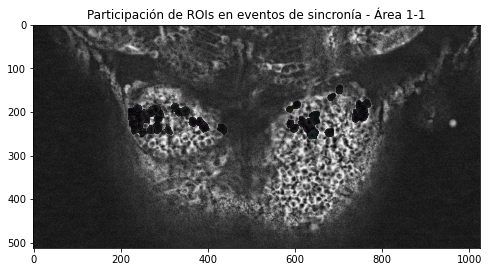

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, leaves_list
from scipy.ndimage import gaussian_filter1d
from matplotlib import cm

# Definir el rango de frames de interés
frame_start = 140
frame_end = 160
min_frames_activos = 2  # Mínimo de frames con valor 1 para considerar un ROI activo

for key in areas:
    # Inicializar un array para contar la participación de cada ROI en los eventos de sincronía.
    # Ajustar la longitud a la cantidad de ROIs presentes en 'roi_lefties' que son True.
    num_rois = np.sum(areas[key].roi_lefties['Hb'] == True)
    roi_sync_count = np.zeros(num_rois)

    for j in range(len(areas[key].trials)):
        if areas[key].trials[j].vis == 0 and areas[key].trials[j].aud == 1:
            # Obtener el array binario que indica la actividad de cada ROI en cada frame.
            binary_activity = areas[key].trials[j].roi_binaries["Hb"][areas[key].roi_lefties['Hb'] == True]

            # Filtrar la actividad binaria en el rango de frames de interés.
            binary_activity_rango = binary_activity[:, frame_start:frame_end + 1]

            # Identificar los ROIs que tienen al menos `min_frames_activos` frames activos (valor 1).
            rois_activos = np.sum(binary_activity_rango, axis=1) >= min_frames_activos

            # Incrementar el contador de participación para los ROIs que estuvieron activos en este trial.
            roi_sync_count[rois_activos] += 1

    # Determinar el máximo de participación para ajustar la escala de color.
    max_participacion = np.max(roi_sync_count)

    # Graficar el template de fondo y las ROIs coloreadas según la cantidad de eventos de sincronía.
    plt.figure(figsize=(8, 8))
    ax = plt.gca()
    ax.set_title(f'Participación de ROIs en eventos de sincronía - Área {key}')

    # Mostrar el template de fondo.
    ax.imshow(areas[key].template, cmap='gray', origin='upper')

    # Normalizar el conteo de eventos para los colores usando el máximo de participación.
    norm_counts = roi_sync_count / max_participacion if max_participacion > 0 else roi_sync_count
    cmap = cm.get_cmap('viridis')  # Colormap para visualizar la escala.

    # Dibujar cada ROI con el color correspondiente.
    for i, contour in enumerate(areas[key].contours['Hb']):
        # Extraer los puntos del contorno de la ROI.
        polygon = np.array(contour)
        # Determinar el color basado en la participación normalizada.
        color = cmap(norm_counts[i])

        # Dibujar el polígono y rellenar con el color calculado.
        ax.fill(polygon[:, 0], polygon[:, 1], color=color, edgecolor='black', alpha=0.8)

    # Mostrar la barra de color para referencia de la participación.
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=max_participacion))
    sm.set_array([])
    plt.colorbar(sm, ax=ax, label=f'Participación en eventos de sincronía (0-{int(max_participacion)})')

    plt.axis('equal')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)
    plt.show()


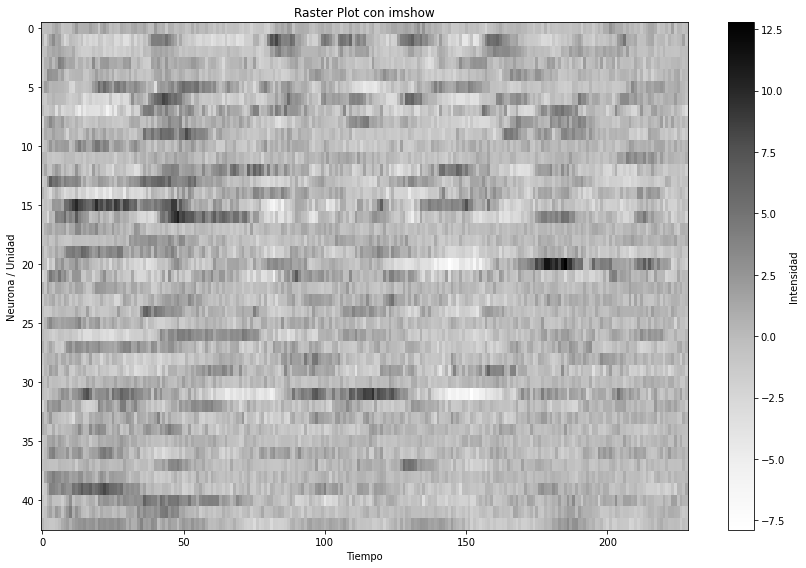

In [19]:
# Convertir la lista de listas a un array de numpy para usar con imshow
data_array = areas["4-1"].trials[0].roi_dffs["Hb"]

# Crear el raster plot utilizando imshow
plt.figure(figsize=(12, 8))
plt.imshow(data_array, aspect='auto', cmap='Greys', interpolation='nearest')

# Configurar el eje para mejorar la visualización
plt.colorbar(label='Intensidad')  # Añadir una barra de colores para referencia
plt.xlabel('Tiempo')
plt.ylabel('Neurona / Unidad')
plt.title('Raster Plot con imshow')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [90]:
plt.plot(areas["1-1"].trials[0].roi_activities["Hb"].mean(axis=0))
plt.show()
plt.plot(areas["1-1"].trials[0].roi_dffs["Hb"].mean(axis=0))
plt.show()
plt.plot(areas["1-1"].trials[0].roi_binaries["Hb"].mean(axis=0))
plt.show()

array([164,  65, 165, 119, 139, 129, 137, 156, 142, 154,  64,  34,  48,
        98, 110,  96, 167,  42, 121,  80,  30, 115,  92,  68,  71,  35,
        41,  47,   8,  18,   9,  17, 117,  72,  77,  86,  33,  55,  61,
        78,  89,  95,  24, 125,  81, 101, 134, 149,  90, 113, 127,  99,
       108, 114, 128,  50,  44,  49, 104,  45,  58,  79,  84, 100,  85,
       160, 161, 168,  59,  76,  11,  19,  66,  67,  83, 144, 106, 126,
       116, 136, 138, 103, 111, 122,  69,  51,  57,  97, 124, 146,  39,
       169,  56,  70, 140, 123, 163,  82,  94, 162,  93,  52,  63, 141,
        27,  40,  25,  14,  16,   2,  20,  28,   5,   0,   1,  13, 105,
       153, 130, 109, 112, 102,  74, 107,  62,  36,  46,  54, 157, 159,
         3, 155,  21,  38,  43,   4,   7,  22,  12,  37, 158,  15, 148,
       166,  60,  88,  31, 152, 143, 150,  53, 132, 147, 118, 131,   6,
        10, 120, 135,  29,  32,  23,  26,  75,  91,  73,  87, 133, 145,
       151], dtype=int32)

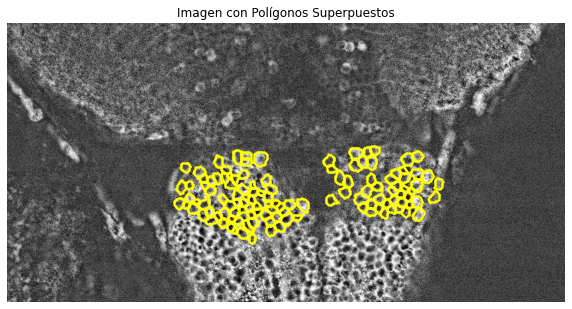

In [23]:

plt.figure(figsize=(10, 8))
key = '26-1'
plt.imshow(areas[key].template, cmap='gray')

# Supongamos que el array que contiene los contornos de los polígonos se llama `polygons`
polygons = areas[key].contours['Hb']

# Dibujar cada polígono en la imagen
for polygon in polygons:
    x_coords = polygon[:, 0]
    y_coords = polygon[:, 1]
    plt.scatter(x_coords, y_coords,  linestyle='-', color='yellow', s=1)

# Mostrar la imagen con los polígonos superpuestos
plt.title('Imagen con Polígonos Superpuestos')
plt.axis('off')  # Opcional: oculta los ejes
plt.show()

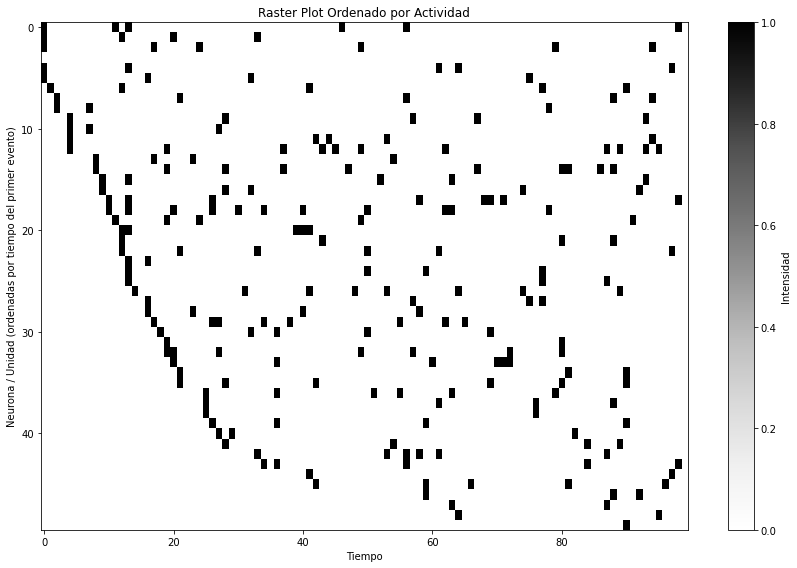

In [122]:
import matplotlib.pyplot as plt
import numpy as np

# Generar datos de ejemplo si aún no tienes los tuyos
# data = [np.random.rand(100) > 0.95 for _ in range(50)]

# Convertir la lista de listas a un array de numpy para manipularlo fácilmente
data_array = np.array(data, dtype=int)

# Encontrar el primer evento (máximo) en cada fila
first_event_indices = np.argmax(data_array, axis=1)

# Ordenar las filas según el índice del primer evento
sorted_indices = np.argsort(first_event_indices)
sorted_data_array = data_array[sorted_indices]

# Crear el raster plot utilizando imshow con los datos ordenados
plt.figure(figsize=(12, 8))
plt.imshow(sorted_data_array, aspect='auto', cmap='Greys', interpolation='nearest')
# plt.imshow(data, aspect='auto', cmap='Greys', interpolation='nearest')

# Configurar el eje para mejorar la visualización
plt.colorbar(label='Intensidad')
plt.xlabel('Tiempo')
plt.ylabel('Neurona / Unidad (ordenadas por tiempo del primer evento)')
plt.title('Raster Plot Ordenado por Actividad')
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [44]:
import numpy as np

# Tu array de ejemplo
arr = np.array([False, True, True, False, True, True, True, False, True, False])

# Encuentra los índices donde comienza cada intervalo de True continuos
start_indices = np.where((arr[:-1] == False) & (arr[1:] == True))[0] + 1

# Si el primer elemento es True, incluirlo también
if arr[0] == True:
    start_indices = np.insert(start_indices, 0, 0)

print("Índices de inicio de cada intervalo de True:", start_indices)


Índices de inicio de cada intervalo de True: [1 4 8]


In [58]:
areas[key].trials[j].roi_dffs.keys()

dict_keys(['Hb'])

In [65]:
from scipy.cluster.hierarchy import linkage, leaves_list
momentos_sincronia = []
key = '10-1'
for key in areas:
    for j in range(len(areas[key].trials)):
        # if  areas[key].trials[j].vis ==0 and areas[key].trials[j].aud == 1 :
            # Convertir la lista de listas a un array de numpy para manipularlo fácilmente
            data_array = areas[key].trials[j].roi_dffs["Hb"][areas[key].roi_lefties['Hb']==True]
            # data_array = areas[key].trials[j].roi_dffs["Hb"]

            # Realizar clustering jerárquico para encontrar la similitud entre filas
            Z = linkage(data_array, method='centroid')
            row_order = leaves_list(Z)

            # Reordenar las filas del array de datos según el orden calculado
            final_sorted_data_array = data_array[row_order, :]

            #Oredenado al primer evento 
            
            # Encontrar el primer evento (máximo) en cada fila
            first_event_indices = np.argmax(data_array, axis=1)

            # Ordenar las filas según el índice del primer evento
            sorted_indices = np.argsort(first_event_indices)
            sorted_data_array = data_array[sorted_indices]


            data_z = sorted_data_array-np.expand_dims(np.mean(sorted_data_array, axis=1), axis=1)
            data_z = data_z/np.expand_dims(np.std(data_z, axis=1), axis=1)

            promedio_data_z = data_z.mean(axis=0)
            promedio_filtrado = gaussian_filter1d(promedio_data_z, 3)
            mascara_th = promedio_filtrado>.4
            indices_mascara = np.where(mascara_th)

            start_indices = np.where((mascara_th[:-1] == False) & (mascara_th[1:] == True))[0] + 1
            if mascara_th[0] == True:
                start_indices = np.insert(start_indices, 0, 0)
            # # Crear el raster plot utilizando imshow con las filas ordenadas y el colormap cividis
            # plt.figure(figsize=(12, 8))
            # # plt.imshow(final_sorted_data_array, aspect='auto', cmap='cividis', interpolation='nearest')
            # # plt.imshow(data_array, aspect='auto', cmap='cividis', interpolation='nearest')
            # plt.imshow(data_z, aspect='auto', cmap='cividis', interpolation='nearest')
            # # plt.imshow(sorted_data_array, aspect='auto', cmap='cividis', interpolation='nearest')

            # # Configurar el eje para mejorar la visualización
            # plt.colorbar(label='Intensidad')
            # plt.xlabel('Tiempo (orden de columnas fijo)') 
            # plt.ylabel('Neurona / Unidad (ordenadas por similitud)')
            # plt.title('Vis '+f'{areas[key].trials[j].vis}'+', Aud '+f'{areas[key].trials[j].aud}')
            # plt.tight_layout()

            # # Mostrar el gráfico
            # plt.show()
            # plt.plot(data_z.mean(axis=0))
            # plt.plot(promedio_filtrado)
            # plt.scatter(indices_mascara, promedio_filtrado[mascara_th])

            # plt.scatter(start_indices, promedio_filtrado[start_indices], color='r')
            # plt.show()
            momentos_sincronia.extend(start_indices)



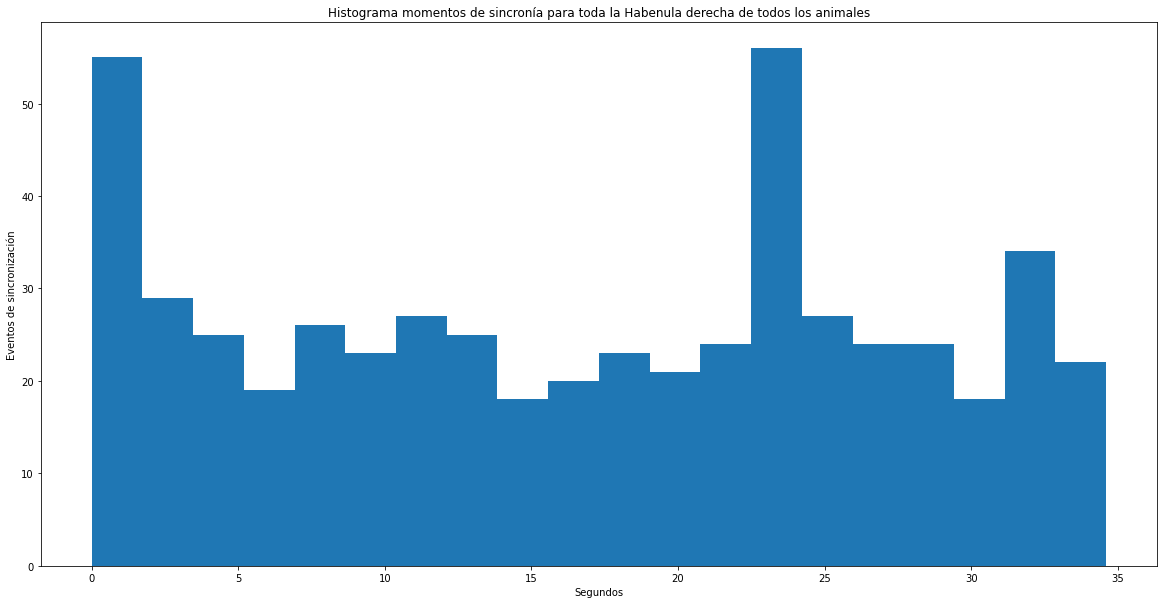

In [66]:

plt.figure(figsize=(20,10))
plt.title('Histograma momentos de sincronía para toda la Habenula derecha de todos los animales')
plt.hist(np.array(momentos_sincronia)/6.3, bins=20)
plt.xlabel('Segundos')
plt.ylabel('Eventos de sincronización')
# plt.savefig('Histograma Sincronia lado derecha')
# plt.figure()
# plt.plot(momentos_sincronia, '.')
# plt.xlim(130,170)

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.cluster.hierarchy import linkage, leaves_list
# from scipy.ndimage import gaussian_filter1d

# for key in areas:
#     for j in range(len(areas[key].trials)):
#         # if areas[key].trials[j].vis == 0 and areas[key].trials[j].aud == 1:
#             # Convertir la lista de listas a un array de numpy para manipularlo fácilmente
#             data_array = areas[key].trials[j].roi_dffs["Hb"][areas[key].roi_lefties['Hb'] == False]

#             # Realizar clustering jerárquico para encontrar la similitud entre filas
#             Z = linkage(data_array, method='centroid')
#             row_order = leaves_list(Z)

#             # Reordenar las filas del array de datos según el orden calculado
#             sorted_data_array = data_array[row_order, :]

#             # Encontrar el primer evento (máximo) en cada fila
#             first_event_indices = np.argmax(data_array, axis=1)

#             # Ordenar las filas según el índice del primer evento
#             sorted_indices = np.argsort(first_event_indices)
#             sorted_data_array = data_array[sorted_indices]

#             # Normalizar los datos
#             data_z = sorted_data_array - np.expand_dims(np.mean(sorted_data_array, axis=1), axis=1)
#             data_z = data_z / np.expand_dims(np.std(data_z, axis=1), axis=1)

#             # Promediar los datos y aplicar filtro gaussiano
#             promedio_data_z = data_z.mean(axis=0)
#             promedio_filtrado = gaussian_filter1d(promedio_data_z, 3)
#             mascara_th = promedio_filtrado > 0.4
#             indices_mascara = np.where(mascara_th)

#             # Encontrar los índices de inicio de los momentos de sincronía
#             start_indices = np.where((mascara_th[:-1] == False) & (mascara_th[1:] == True))[0] + 1
#             if mascara_th[0] == True:
#                 start_indices = np.insert(start_indices, 0, 0)

#             # Almacenar momentos de sincronía
#             momentos_sincronia = start_indices

#             # Plotear las unidades que participan en los momentos de sincronía
#             for momento in momentos_sincronia:
#                 # Identificar unidades activas en este momento
#                 unidades_activas = np.where(sorted_data_array[:, momento] > 0)[0]

#                 # Generar gráfico
#                 plt.figure(figsize=(10, 6))
#                 plt.imshow(sorted_data_array, aspect='auto', cmap='viridis')
#                 plt.colorbar(label='Actividad (z-score)')
#                 plt.scatter([momento] * len(unidades_activas), unidades_activas, color='red', label='Unidades activas')
#                 plt.title(f'Momento de sincronía en el trial {j}, área {key}, en el tiempo {momento}')
#                 plt.xlabel('Tiempo')
#                 plt.ylabel('Unidades')
#                 plt.legend()
#                 plt.show()


In [80]:
areas[key].trials[j].roi_dffs["Hb"]

array([[ 0.64502558, -0.84704269, -0.66846749, ..., -0.69254614,
        -0.78618372, -0.52326965],
       [-1.64699292, -0.55881705,  0.4096631 , ...,  0.05125748,
        -0.334621  , -0.49392709],
       [ 0.27359031, -1.32940607,  0.07148365, ...,  0.56613995,
         0.64454428,  0.25628483],
       ...,
       [ 0.03104014,  0.24334264, -0.05719266, ...,  0.5361935 ,
        -0.23324357, -0.05058437],
       [-2.66215879,  1.45799176,  5.52534887, ...,  3.75236689,
        -0.1177376 , -0.57754577],
       [-3.10805037,  0.63745739,  3.07969862, ...,  1.0648336 ,
        -2.00672641, -3.14208346]])

In [88]:
areas[key].roi_lefties['Hb']

array([ True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False,  True,  True,
       False, False,  True, False, False, False, False,  True, False,
       False,  True, False, False,  True, False,  True,  True, False,
       False,  True, False, False, False,  True,  True, False, False,
       False,  True, False, False,  True, False,  True, False,  True,
       False,  True, False,  True, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True])

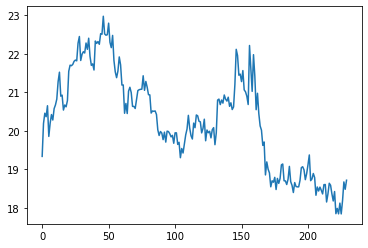

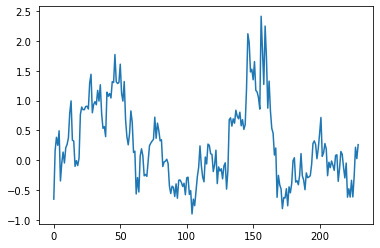

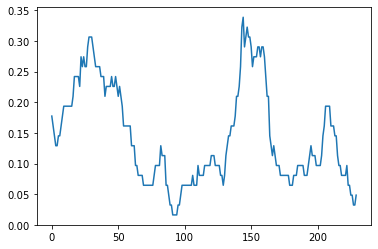

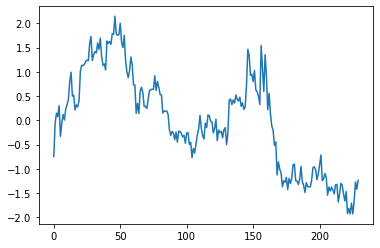

In [51]:
plt.plot(areas["1-1"].trials[1].roi_activities["Hb"].mean(axis=0))
plt.show()
plt.plot(areas["1-1"].trials[1].roi_dffs["Hb"].mean(axis=0))
plt.show()
plt.plot(areas["1-1"].trials[1].roi_binaries["Hb"].mean(axis=0))
plt.show()


In [ ]:
promedio_de_promedios = np.zeros((6,229))
RorL = True
Region = 'Hb'
for j,key in enumerate(areas):
    plt.figure(figsize=(12,6))
    roi_dffs_step = np.zeros((5,229))
    incremento = 0
    for tr in areas[key].trials:
        if tr.vis==0 and tr.aud==0:
            roi_dffs_step[incremento,:] =  tr.roi_activities[Region][areas[key].roi_lefties[Region]==RorL].mean(axis=0)[:229]
            incremento+=1
    plt.title(str(key)+' '+str(Region)+', Lado derecho: '+ str(RorL))
    plt.plot(roi_dffs_step.mean(axis=0))
    promedio_de_promedios[j,:] = roi_dffs_step.mean(axis=0)
    plt.savefig(str(key)+'_'+str(Region)+'_'+str(RorL)+'.png')
plt.figure(figsize=(12,6))
plt.title('promedio_de_promedios')
plt.plot(promedio_de_promedios.mean(axis=0))
plt.savefig('PromedioTodos_'+str(Region)+'_'+str(RorL)+'.png')


In [ ]:
promedio_de_promedios = np.zeros((6,229))
RorL = True
Region = 'Hb'
for j,key in enumerate(areas):
    plt.figure(figsize=(12,6))
    roi_dffs_step = np.zeros((5,229))
    incremento = 0
    for tr in areas[key].trials:
        if tr.vis==0 and tr.aud==0:
            roi_dffs_step[incremento,:] =  tr.roi_binaries[Region][areas[key].roi_lefties[Region]==RorL].mean(axis=0)[:229]
            incremento+=1
    plt.title(str(key)+' '+str(Region)+', Lado derecho: '+ str(RorL))
    plt.plot(roi_dffs_step.mean(axis=0))
    promedio_de_promedios[j,:] = roi_dffs_step.mean(axis=0)
    # plt.savefig(str(key)+'_'+str(Region)+'_'+str(RorL)+'.png')
plt.figure(figsize=(12,6))
plt.title('promedio_de_promedios')
plt.plot(promedio_de_promedios.mean(axis=0))
# plt.savefig('PromedioTodos_'+str(Region)+'_'+str(RorL)+'.png')



In [ ]:
tr = 2
plt.plot(areas["1-1"].trials[tr].roi_activities["palium"].mean(axis=0))
plt.show()
plt.plot(areas["1-1"].trials[tr].roi_dffs["palium"].mean(axis=0))
plt.show()
plt.plot(areas["1-1"].trials[tr].roi_binaries["palium"].mean(axis=0))
plt.show()

In [13]:
for key in areas:
    for trial in areas[key].trials:
        trial.video = None
    areas[key].stack = None
    areas[key].m_rig = None
    save_area(res_dir, key, areas[key])

In [23]:
for key in areas:
    save_area(res_dir, key, areas[key])

In [54]:
areas['12-1'].__dict__.keys()

dict_keys(['pez', 'n', 'trials', 'template', 'polygons_per_area', 'subtemplates', 'fecha', 'x', 'y', 'z', 'regions', 'template_small', 'factor', 'polygons_per_area_small', 'midline_points', 'grids', 'contours', 'centers', 'contours_small', 'centers_small', 'grid_lefties', 'roi_lefties', 'stack', 'm_rig'])

In [62]:
areas['12-1'].contours_small['Hb'][0][i]

array([88, 51])

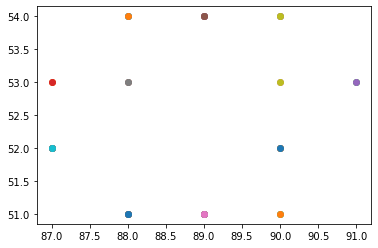

In [63]:
plt.figure()
for i in range(len(areas['12-1'].contours_small['Hb'][0])):
    plt.scatter(areas['12-1'].contours_small['Hb'][0][i][0],areas['12-1'].contours_small['Hb'][0][i][1])